In [1]:
%pylab notebook 

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ipywidgets import interactive, IntSlider, fixed
import matplotlib.patches as patches
from matplotlib import animation

In [3]:
from rl.analysis import stadium
from importlib import reload
import ballchasing_downloader as bd
import numpy as np

In [4]:
data = bd.open_pandas('5985549d-9b57-45ae-a67b-5aec326e4d1e.gzip')
pos = data.loc[:, (slice(None), ['pos_x', 'pos_y'])]
stack_pos = pos.stack(level=0)

In [5]:
actors = ['ball', 'heylookafork', 'bignuggs']
cmaps = [plt.cm.Greys, plt.cm.Oranges, plt.cm.Blues]
    
def plot_play(time, ax, trans):
    stadium.draw_2d_court(ax, trans)
    art = []
    for a, cmap in zip(actors, cmaps):
        sub_t = pos.loc[time - 50:time, a]
        art.append(
            ax.scatter(
                sub_t['pos_x'], sub_t['pos_y'],
                transform=trans, c=sub_t.index.values / max(sub_t.index.values), cmap=cmap)
        )
    return art

<IPython.core.display.Javascript object>


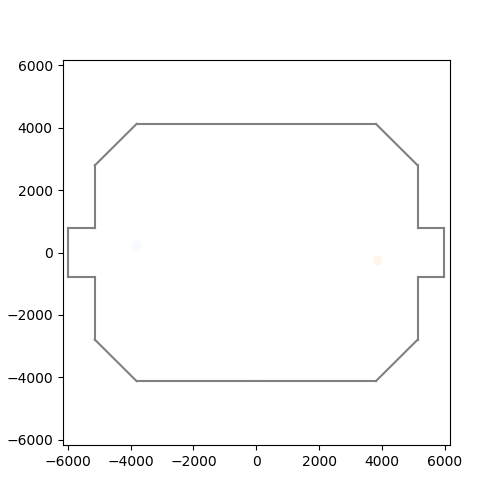

interactive(children=(Dropdown(description='time', options=(1, 21, 41, 61, 81, 101, 121, 141, 161, 181, 201, 2…

In [6]:
fig, ax, trans = stadium.prep_2d_court(5, True)
interactive(plot_play, time=range(1,8000,20),  ax=fixed(ax), trans=fixed(trans))

In [7]:
pos3 = data.loc[:, (actors, ('pos_x', 'pos_y', 'pos_z'))]

In [8]:
anim = False
if anim:
    total_time = 4000

    def init():
        fig, ax = stadium.prep_3d_court(5)
        stadium.draw_3d_court(ax)


    def draw_play(time):
        art = []
        for a, cmap in zip(actors, cmaps):
            sub_t = pos3.loc[time - 40:time, a]
            cs = [cmap(c) for c in np.linspace(0.5, 1, num=len(sub_t))]
            art.append(
                ax.scatter3D(sub_t['pos_x'], sub_t['pos_y'], sub_t['pos_z'],
                             c=cs)
            )
        return art


    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=10, bitrate=1800)

    arts = [draw_play(time) for time in range(1, total_time, 10)]

    ani = animation.ArtistAnimation(fig, arts, interval=100, blit=True)
    ani.save('out3d.mp4', writer=writer)

<IPython.core.display.Javascript object>


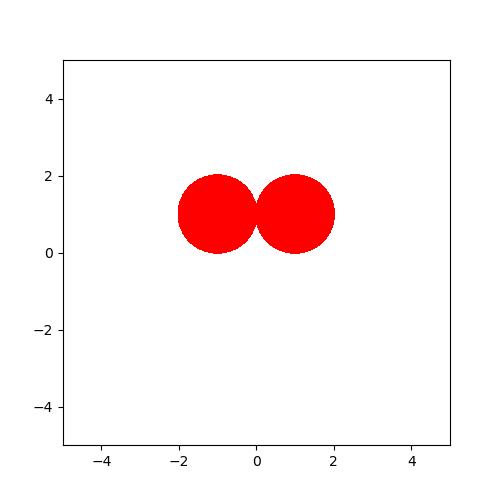

In [31]:
from matplotlib import patches
from matplotlib import animation

fig = plt.figure(figsize=(5, 5))

def init():
    circ = patches.Circle((-1, 1), radius=1, color='red')
    ax = gca()
    ax.add_patch(circ)
    xlim(-5, 5)
    ylim(-5, 5)


def update(n):
    rad = n % 3
    circ.set_radius(rad)
    circ.set_alpha(rad / 3)
    
    return [circ],

anim = animation.FuncAnimation(func=update, fig=fig, init_func=init, frames=100)
anim.save('test.mp4', writer='ffmpeg', fps=2)